In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import seaborn as sns
import missingno as msno
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import preprocessing

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df = pd.read_csv('../input/titanic/train.csv')

df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


# Missing data cleaning

<AxesSubplot:>

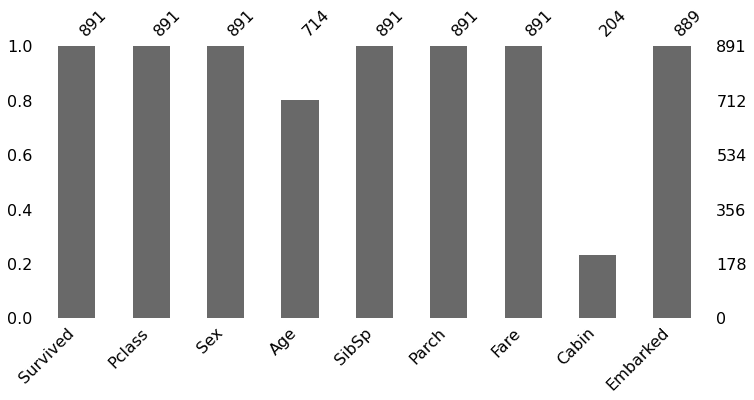

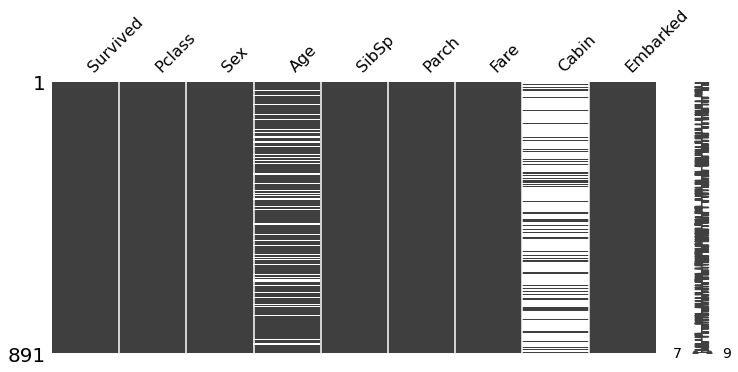

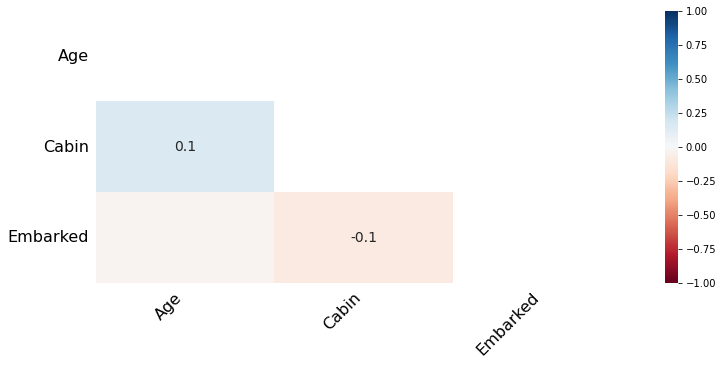

In [4]:
# Missing data display
msno.bar(df,figsize=(12,5))
msno.matrix(df,figsize=(12,5))
msno.heatmap(df,figsize=(12,5))

In [5]:
# Duplicate removal 
df.drop_duplicates(inplace=True)

# Dropping Embarked entries as it's completely random
df.fillna(value={'Embarked':-1}, inplace=True)

# Dropping Cabin column, as it's mostly missing and cannot be imputed
df.drop(['Cabin'], axis=1, inplace=True)

# Imputing Age column as its missing value percentage is low and we can use imputation
df['Age']=df['Age'].replace(np.NaN,df['Age'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  784 non-null    int64  
 1   Pclass    784 non-null    int64  
 2   Sex       784 non-null    object 
 3   Age       784 non-null    float64
 4   SibSp     784 non-null    int64  
 5   Parch     784 non-null    int64  
 6   Fare      784 non-null    float64
 7   Embarked  784 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.1+ KB


# Categorizing features

In [6]:
# Categorizing features
display(df.columns) 
categorical_object = ['Sex','Embarked'] 
categorical_numeric = ['Pclass','SibSp','Parch']
continuous = ['Age','Fare'] 
target = 'Survived'

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

# EDA
Main questions:
1. Which variables were the main predictor of survival?
2. Which variables are correlated?

### Target variable analysis

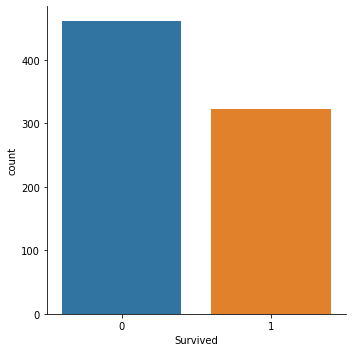

In [7]:
sns.catplot(x="Survived", kind="count", data=df)

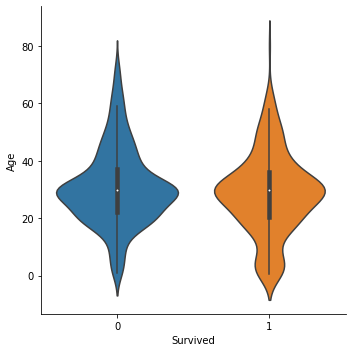

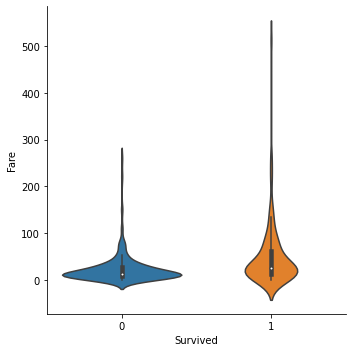

In [8]:
# Violin the target numeric variable distribution for categorical features 
for column in df[continuous].columns: 
    sns.catplot(x=target, y=column, kind="violin", data=df)  
    plt.show()

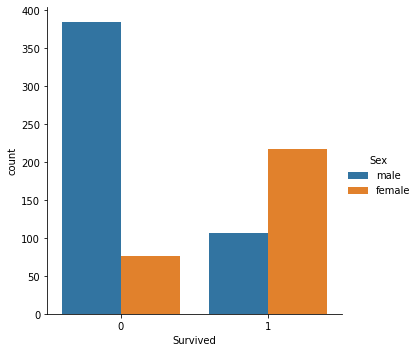

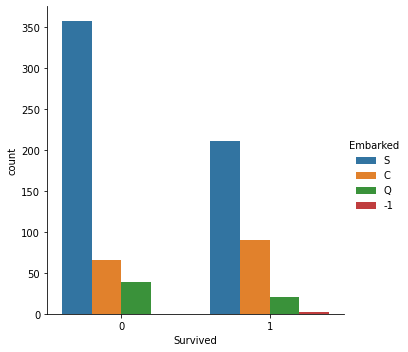

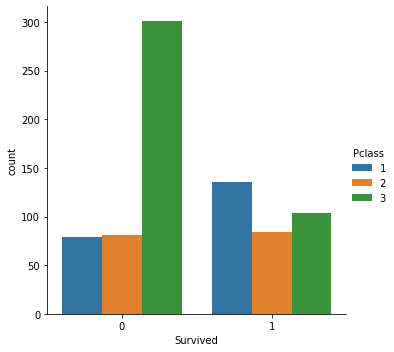

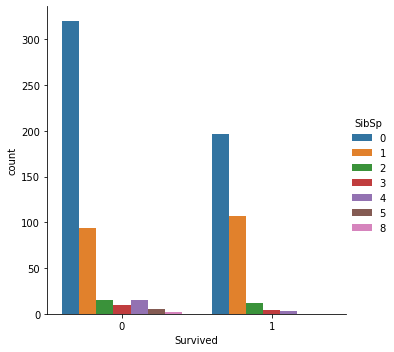

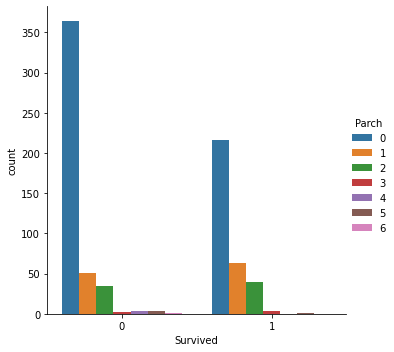

In [9]:
# Count plot between categorical target variable and categorial features 
for column in df[categorical_object+categorical_numeric].columns:
    sns.catplot(x=target, hue=column, kind='count', data=df)
    plt.show()

### Categorical variables analysis

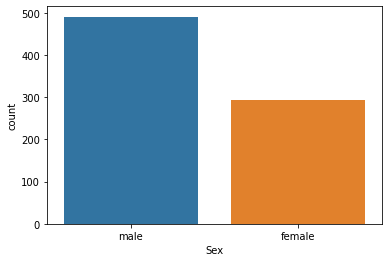

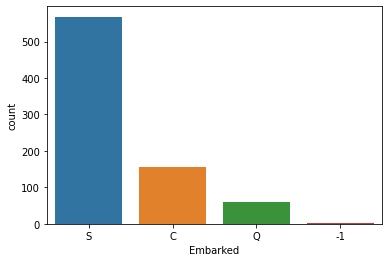

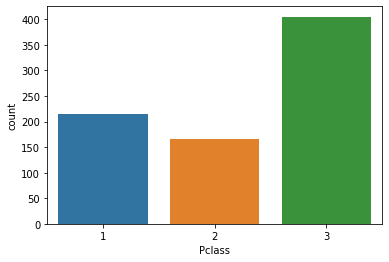

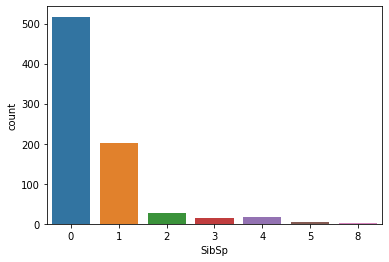

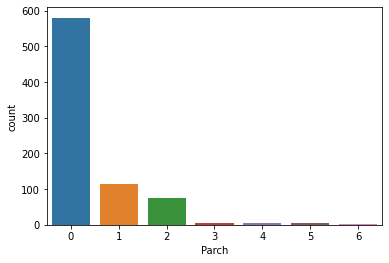

In [10]:
# Categorical value counts
for column in df[categorical_object+categorical_numeric].columns: 
    sns.countplot(x=column, data=df) 
    plt.show()

### Continuous variables analysis

'Age skewness: 0.39501727197586284'

'Age kurtosis: 0.5742473797759913'

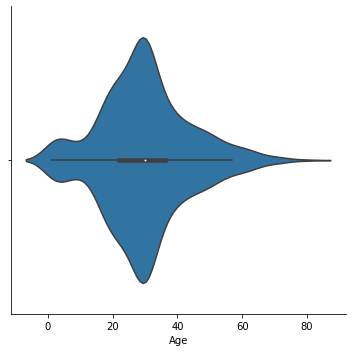

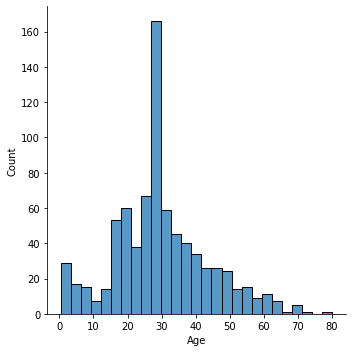

'Fare skewness: 4.570768460673977'

'Fare kurtosis: 30.20805166179377'

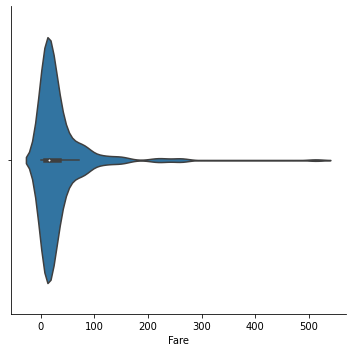

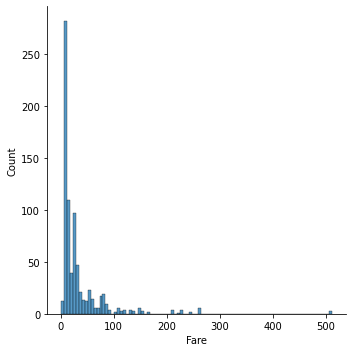

In [11]:
# Violin plot, skewness and distribution for continuous variables 
for column in continuous: 
    sns.catplot(x=column, kind="violin", data=df) 
    sns.displot(df[column])
    display(column+" skewness: "+str(df[column].skew()))
    display(column+" kurtosis: "+str(df[column].kurt()))
    plt.show()

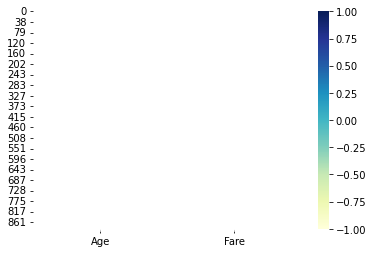

In [12]:
# Correlation between numeric variables
sns.heatmap(df[continuous], vmax=1., vmin=-1., annot=True, linewidths=.8, cmap="YlGnBu");

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


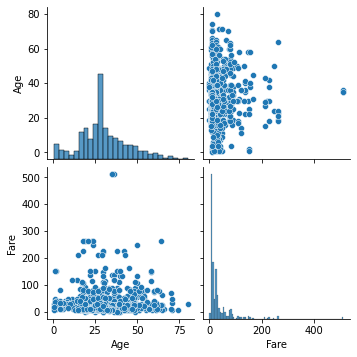

In [13]:
# Scatter plot between features
sns.pairplot(df[continuous], size = 2.5)

Age, sex, class look like variables with most influence